## 📚 Importation des bibliothèques

- `pandas` et `numpy` : pour la manipulation des données.
- `matplotlib.pyplot` et `seaborn` : pour les visualisations.
- `train_test_split`, `StandardScaler` : pour préparer les données.
- `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier` : différents modèles de classification.
- `GridSearchCV` : pour la recherche d'hyperparamètres optimaux.
- Métriques de performance (`accuracy_score`, `precision_score`, etc.) : pour évaluer la qualité des modèles.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## 📄 Chargement et aperçu du dataset

- Chargement du fichier "Breast Cancer Wisconsin.csv" avec `pd.read_csv()`.
- Utilisation de :
  - `df.head()` pour afficher les 5 premières lignes.
  - `df.info()` pour des infos générales sur les colonnes (types, valeurs manquantes).
  - `df.describe()` pour un résumé statistique des colonnes numériques.

📌 Objectif : Avoir un premier aperçu du dataset pour mieux comprendre sa structure et identifier d’éventuels problèmes (valeurs manquantes, types de données, etc.).


In [9]:
df = pd.read_csv("Breast Cancer Wisconsin.csv")
print(df.head())
print(df.info())
print(df.describe())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## 📊 Visualisation de la répartition des diagnostics

Utilisation de `sns.countplot()` pour visualiser le nombre de cas **malins (M)** et **bénins (B)** dans le dataset.

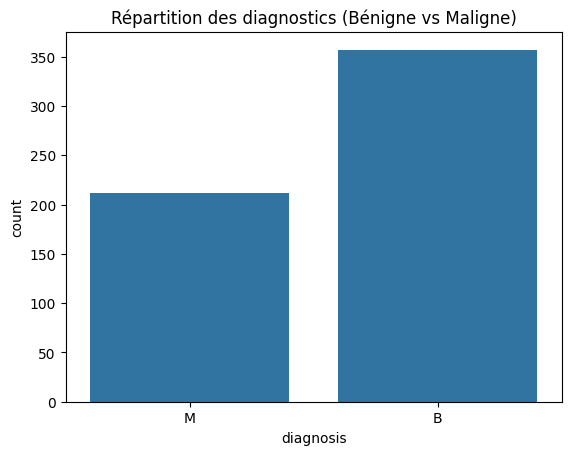

In [10]:
sns.countplot(x='diagnosis', data=df)
plt.title("Répartition des diagnostics (Bénigne vs Maligne)")
plt.show()

## 🔍 Vérification des valeurs manquantes et des doublons

Avant d'entraîner les modèles, il est essentiel de vérifier si le dataset contient des **valeurs manquantes** ou des **doublons**, ce qui pourrait fausser l’analyse.


In [ ]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Vérifier les doublons
print("Doublons :", df.duplicated().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## 🧹 Nettoyage : Suppression des colonnes inutiles

Nous supprimons deux colonnes du dataset :
- `Unnamed: 32` : colonne vide contenant uniquement des NaN.
- `id` : identifiant unique sans intérêt pour l’analyse.

In [12]:
# Supprimer la colonne inutile
df = df.drop(['Unnamed: 32'], axis=1)
df = df.drop(['id'], axis=1)


## 🔁 Transformation de la variable cible (`diagnosis`)

Nous convertissons les valeurs de la colonne `diagnosis` en valeurs numériques :
- `B` (bénigne) devient `0`
- `M` (maligne) devient `1`

In [17]:
# B -> 0 (Bénigne), M -> 1 (Maligne)
# map(permet de transformer les val d'une col en remplacant par autre val )
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

## 🧪 Séparation des caractéristiques (X) et de la cible (y)

Nous séparons les données en :
- **X** : les caractéristiques (toutes les colonnes sauf `diagnosis`)
- **y** : la variable cible (`diagnosis`)

In [14]:
X = df.drop('diagnosis', axis=1)  # Caractéristiques
y = df['diagnosis']               # Cible


## 🔄 Normalisation des données

Nous utilisons `StandardScaler` pour centrer les données autour de 0 avec un écart-type de 1. Cela est essentiel pour améliorer la performance des modèles sensibles à l’échelle.

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

## 🎯 Séparation des jeux d’entraînement et de test

- On divise `X_scaled` et `y` en :
  - **80 %** pour l’entraînement (`X_train`, `y_train`)
  - **20 %** pour le test (`X_test`, `y_test`)
- `random_state=42` pour rendre la découpe reproductible.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Taille X_train :", X_train.shape)
print("Taille X_test :", X_test.shape)


Taille X_train : (455, 30)
Taille X_test : (114, 30)


## 1️⃣ Régression Logistique

Nous utilisons la **régression logistique** pour effectuer la classification binaire :
- `max_iter=1000` pour assurer la convergence du modèle.
- On entraîne le modèle sur les données d'entraînement.

In [20]:
# 1. Régression Logistique
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("🔹 Régression Logistique entraînée.")

🔹 Régression Logistique entraînée.


## 2️⃣ Classification avec K-Nearest Neighbors (KNN)

Le modèle KNN classe les points en fonction de leurs **voisins les plus proches** :
- `n_neighbors=5` signifie qu’on regarde les 5 voisins les plus proches pour classer chaque point.
- Ce modèle est **non paramétrique** et **paresseux** (il n’apprend pas de fonction, il garde en mémoire les données).

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("🔹 Modèle KNN (k=5) entraîné.")

🔹 Modèle KNN (k=5) entraîné.


## 3️⃣ Classification avec un Arbre de Décision

Un **arbre de décision** apprend à classer les données en posant une série de **questions binaires** sur les caractéristiques. C’est un modèle :
- **Facile à comprendre et visualiser**
- Souvent sujet à l’**overfitting** si non régularisé

In [22]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("🔹 Arbre de Décision entraîné.")

🔹 Arbre de Décision entraîné.


## 4️⃣ Optimisation – Régression Logistique avec GridSearchCV

L’objectif ici est d’**ajuster automatiquement les hyperparamètres** de la régression logistique pour obtenir le meilleur modèle possible.



In [30]:
 # 🔹 1. Optimisation pour Régression Logistique
param_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supporte l1 et l2
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_log, cv=5)
grid_log.fit(X_train, y_train)

print("Meilleurs paramètres Régression Logistique :", grid_log.best_params_)


Meilleurs paramètres Régression Logistique : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


## 5️⃣ Optimisation – KNN avec GridSearchCV

Ici, nous cherchons à trouver les meilleurs paramètres pour le modèle **K-Nearest Neighbors** à l'aide de `GridSearchCV`.

In [32]:
#  Optimisation pour KNN
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Meilleurs paramètres KNN :", grid_knn.best_params_)


Meilleurs paramètres KNN : {'n_neighbors': 7, 'weights': 'distance'}


## 6️⃣ Optimisation – Arbre de Décision avec GridSearchCV

L’objectif ici est de trouver la combinaison optimale d’hyperparamètres pour un arbre de décision.

In [34]:
# 3. Optimisation pour Arbre de Décision
param_tree = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_tree, cv=5)
grid_tree.fit(X_train, y_train)

print("Meilleurs paramètres Arbre de Décision :", grid_tree.best_params_)


Meilleurs paramètres Arbre de Décision : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


## 7️⃣ 🔁 Réentraînement des Modèles avec les Meilleurs Paramètres

Une fois les meilleurs hyperparamètres trouvés, on réentraîne chaque modèle sur l’ensemble d’apprentissage (`X_train`, `y_train`) pour obtenir des prédictions plus performantes.


In [36]:
# 🔁 Réentraînement avec meilleurs paramètres
log_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000)
log_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

## 8️⃣ 📈 Évaluation des Modèles sur l’Ensemble de Test

On teste la performance des modèles sur les données de test. On utilise plusieurs métriques importantes :

- **Accuracy** : taux de bonnes prédictions
- **Precision** : exactitude des prédictions positives
- **Recall** : couverture des cas positifs réels
- **F1 Score** : compromis entre précision et rappel
- **Classification Report** : vue détaillée pour chaque classe (0 = bénin, 1 = malin)



In [ ]:
models = {
    "Régression Logistique": log_model,
    "KNN": knn_model,
    "Arbre de Décision": tree_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n {name}")
    #  Calcule et affiche la précision (accuracy) du modèle, qui mesure le pourcentage de prévisions correctes sur l'ensemble 
    print("Accuracy :", accuracy_score(y_test, y_pred))
    # Calcule la précision, c'est-à-dire le taux de vrais positifs parmi tous les positifs prédis
    print("Precision :", precision_score(y_test, y_pred, pos_label=1))
    # Calcule le rappel (recall), qui mesure combien des réels positifs ont été correctement identifiés
    print("Recall :", recall_score(y_test, y_pred, pos_label=1))
    #Affiche le score F1, qui est la moyenne harmonique entre précision et rappel, et donne une mesure unique de la performance du modèle.
    print("F1 Score :", f1_score(y_test, y_pred, pos_label=1))
    #  Genère et affiche un rapport de classification détaillé qui inclut des informations supplémentaires sur la performance du modèle pour chaque classe
    print("Classification Report :\n", classification_report(y_test, y_pred))


 Régression Logistique
Accuracy : 0.9912280701754386
Precision : 1.0
Recall : 0.9767441860465116
F1 Score : 0.9882352941176471
Classification Report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


 KNN
Accuracy : 0.9473684210526315
Precision : 0.9302325581395349
Recall : 0.9302325581395349
F1 Score : 0.9302325581395349
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


 Arbre de Décision
Accuracy : 0.9649122807

## 🔳 Matrice de Confusion – Arbre de Décision

La matrice de confusion est un outil essentiel pour visualiser les performances d’un modèle de classification. Elle affiche le nombre de **prédictions correctes et incorrectes** effectuées par le modèle, en les comparant aux vraies étiquettes.

|                  | Prédit Bénin | Prédit Malin |
|------------------|--------------|---------------|
| Réel Bénin       | 71           | 0             |
| Réel Malin       | 4            | 39            |

### 🧠 Interprétation

- ✅ **71** cas bénins ont été correctement classés comme bénins.
- ✅ **39** cas malins ont été correctement identifiés.
- ❌ **4** cas malins ont été classés à tort comme bénins (**faux négatifs**), ce qui peut être critique dans le contexte du diagnostic médical.
- ✅ Aucun cas bénin n’a été mal classé comme malin (**pas de faux positifs**).

Le modèle présente donc une **bonne capacité de généralisation**, avec une très légère tendance à sous-estimer certains cas malins.


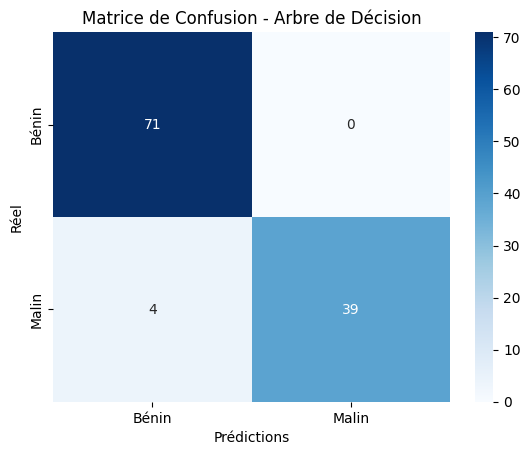

In [ ]:
# confusion_matrix pour générer une matrice qui compare les valeurs réelles (y_test) avec les valeurs prédites par le modèle (y_pred). 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bénin", "Malin"], yticklabels=["Bénin", "Malin"])
plt.title(f"Matrice de Confusion - {name}")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

## 💾 Sauvegarde du Modèle – Régression Logistique

Une fois que le modèle a été optimisé et entraîné avec les meilleurs paramètres (`GridSearchCV`), il est important de le sauvegarder pour une utilisation future sans avoir à le réentraîner.

Dans ce cas, nous utilisons le module `pickle`, qui permet de **sérialiser le modèle** et de le stocker dans un fichier binaire (`logistic_model.pkl`).

### 🔐 Avantages :
- Gain de temps (pas besoin de réentraîner à chaque exécution)
- Facilité de déploiement ou d'intégration dans une API
- Réutilisation pour prédictions sur de nouvelles données

Le modèle a été sauvegardé avec succès sous le nom **`logistic_model.pkl`**.


In [57]:
import pickle

# Sauvegarde du modèle entraîné
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(grid_log.best_estimator_, f)

print("✅ Modèle sauvegardé correctement")


✅ Modèle sauvegardé correctement


## 🖥️ Création de l'application Web avec Streamlit

Afin de permettre une interaction simple et intuitive avec notre modèle de prédiction du cancer du sein, nous avons développé une **interface Web** avec la bibliothèque **Streamlit**.

Cette interface permet à l’utilisateur de renseigner manuellement certaines caractéristiques de la tumeur (ex: `mean radius`, `mean texture`, etc.). À partir de ces données, le modèle entraîné avec `LogisticRegression` et sauvegardé sous forme de fichier `.pkl` est chargé, puis utilisé pour prédire si la tumeur est **bénigne** ou **maligne**.

### ⚙️ Étapes :

1. Installer Streamlit : `pip install streamlit`
2. Lancer l’application : `streamlit run app.py`
3. Remplir les champs dans l’interface.
4. Cliquer sur **🔍 Prédire** pour afficher le résultat.

### 🎯 Objectif :

> Offrir une solution simple, rapide et interactive pour faire des prédictions médicales en ligne, à partir d’un modèle préalablement entraîné.


In [58]:
# 1. Installer Streamlit : pip install streamlit
# 2. Lancer l'app : streamlit run app.py

import streamlit as st
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression

# Charger le modèle entraîné (supposons que tu l’as sauvegardé avec pickle)
model = pickle.load(open("logistic_model.pkl", "rb"))

st.title("🔬 Diagnostic du Cancer du Sein")

st.write("Entrez les mesures de la tumeur pour obtenir une prédiction (Bénin / Malin).")

# Exemple avec 5 features (à adapter selon ton dataset)
mean_radius = st.number_input("Mean Radius", min_value=0.0)
mean_texture = st.number_input("Mean Texture", min_value=0.0)
mean_perimeter = st.number_input("Mean Perimeter", min_value=0.0)
mean_area = st.number_input("Mean Area", min_value=0.0)
mean_smoothness = st.number_input("Mean Smoothness", min_value=0.0)

if st.button("🔍 Prédire"):
    input_data = np.array([[mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]])
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.error("⚠️ Diagnostic : **Malin**")
    else:
        st.success("✅ Diagnostic : **Bénin**")


2025-05-11 23:02:40.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:40.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:40.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:40.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:40.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:40.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:40.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:40.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## 🧠 Chargement du Modèle Enregistré avec `pickle`

---

### 🎯 Objectif

L’objectif de cette étape est de **charger le modèle de machine learning précédemment sauvegardé**, afin de l’utiliser pour effectuer des prédictions, notamment dans une application ou un script de déploiement.



In [59]:
import pickle
with open('logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)


## 🎛️ Création d’un Champ Numérique : Rayon moyen
### 🎯 Objectif
L'objectif de cette étape est d’ajouter un champ interactif dans l’interface utilisateur afin de permettre la saisie du rayon moyen d'une tumeur. Cette caractéristique est cruciale dans l’évaluation du risque de cancer du sein, et sera utilisée comme entrée du modèle prédictif.

In [60]:
import streamlit as st
radius_mean = st.number_input('Rayon moyen', min_value=0.0)


2025-05-11 23:02:47.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:47.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:47.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:47.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:47.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 23:02:47.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


# 🔬Diagnostic du Cancer du Sein avec Streamlit

Cette application web simple permet de prédire si un patient présente un cancer du sein bénin ou malin en fonction de certaines caractéristiques extraites des images médicales. Le modèle utilisé est une régression logistique pré-entraînée.

Les paramètres demandés à l'utilisateur sont :  
- Mean Radius  
- Mean Texture  
- Mean Perimeter  
- Mean Area  
- Mean Smoothness  

L'utilisateur renseigne ces valeurs et clique sur "Prédire" pour obtenir le diagnostic.


In [8]:
import streamlit as st
import pandas as pd
import pickle

# Charger le modèle
with open('logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)
# Titre de l'application
st.title("Diagnostic du Cancer du Sein")

# Champs pour l'entrée utilisateur
mean_radius = st.number_input("Mean Radius", min_value=0.0, format="%.2f")
mean_texture = st.number_input("Mean Texture", min_value=0.0, format="%.2f")
mean_perimeter = st.number_input("Mean Perimeter", min_value=0.0, format="%.2f")
mean_area = st.number_input("Mean Area", min_value=0.0, format="%.2f")
mean_smoothness = st.number_input("Mean Smoothness", min_value=0.0, format="%.5f")

# Bouton pour faire la prédiction
if st.button("Prédire"):
    features = [[mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]]
    prediction = model.predict(features)
    if prediction[0] == 1:
        st.error("⚠️ Cancer Malin détecté")
    else:
        st.success("✅ Cancer Bénin détecté")


2025-05-21 00:19:42.799 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 00:19:43.431 
  command:

    streamlit run C:\Users\kouik\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-21 00:19:43.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 00:19:43.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 00:19:43.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 00:19:43.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 00:19:43.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 00:19:43.441 Sess